# Research Question
As the project’s data scientist, it is my job to answer the following research question: What is the sentiment of a customer's review?

## Project Goal
The goal of this analysis is to classify the sentiment of the following restaurant reviews:

1.	The pizza was disappointing. After a few bites, it left a weird taste in my mouth.

2.	The soup is spicy and super flavorful. This is my favorite place to eat!

## Analysis
This research question will be answered using natural language processing, specifically a Recurrent Neural Network (RNN) model. RNN is a type of neural network capable of performing text classification tasks such as sentiment analysis.

In [286]:
# read data into pandas DataFrame
import pandas as pd

df = pd.read_csv('source/yelp_labelled.csv', header=None)
df.head(5)

,0,1,2,3,4,5
0,Wow... Loved this place.,1,NaN,NaN,NaN,NaN
1,Crust is not good.,0,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,NaN,NaN,NaN,NaN


In [287]:
df.shape

(992, 6)

# Data Preparation

In [288]:
# fill NA values
df.fillna(value='', inplace=True)
df.head(5)

,0,1,2,3,4,5
0,Wow... Loved this place.,1,,,,
1,Crust is not good.,0,,,,
2,Not tasty and the texture was just nasty.,0,,,,
3,Stopped by during the late May bank holiday of...,1,,,,
4,The selection on the menu was great and so wer...,1,,,,


In [289]:
# combine all columns to create 'review' column
df = df.astype('string')
df['review'] = df[0] + df[1] + df[2] + df[3] + df[4] + df[5]
df.review

0                              Wow... Loved this place.1
1                                    Crust is not good.0
2             Not tasty and the texture was just nasty.0
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
987    I think food should have flavor and texture an...
988                            Appetite instantly gone.0
989    Overall I was not impressed and would not go b...
990    The whole experience was underwhelming and I t...
991    Then as if I hadn't wasted enough of my life t...
Name: review, Length: 992, dtype: string

In [290]:
# create 'sentiment' column using slice of 'review' column
df['sentiment'] = df.review.str.slice(start=-1)
df.sentiment

0      1
1      0
2      0
3      1
4      1
      ..
987    0
988    0
989    0
990    0
991    0
Name: sentiment, Length: 992, dtype: string

In [291]:
# remove score from 'review' column using slice of 'review' column
df.review = df.review.str.slice(stop=-1)
df.review

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
987    I think food should have flavor and texture an...
988                             Appetite instantly gone.
989    Overall I was not impressed and would not go b...
990    The whole experience was underwhelming and I t...
991    Then as if I hadn't wasted enough of my life t...
Name: review, Length: 992, dtype: string

In [292]:
# update DataFrame to contain 'review' and 'sentiment' only
df = df[['review', 'sentiment']]
df.head(5)

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data Exploration

In [293]:
df.sentiment.value_counts()

0    497
1    495
Name: sentiment, dtype: Int64

Sentiment has two values, 0 and 1 (negative and positive, respectively). The number of negative and positive reviews is roughly equal.

In [294]:
# return all rows containing non alphanumeric characters
df[df.review.str.contains("[^a-zA-Z\d\s\'\.]") == True]

,review,sentiment
6,Honeslty it didn't taste THAT fresh.),0
13,I tried the Cape Cod ravoli chickenwith cranbe...,1
20,The Burrittos Blah!,0
26,- They never brought a salad we asked for.,0
31,This was like the final blow!,0
...,...,...
953,If someone orders two tacos don't' you think i...,0
955,After all the rave reviews I couldn't wait to ...,0
961,I don't know what the big deal is about this p...,0
977,The problem I have is that they charge $11.99 ...,0


There are 257 rows containing unusual characters. Examples of these unusual characters can be seen in the above output.

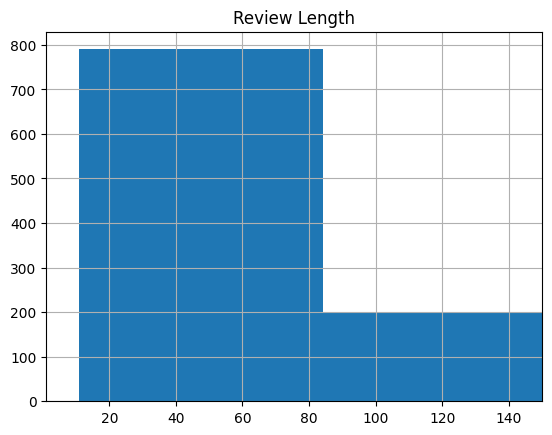

In [295]:
# import matplotlib for visualizations
import matplotlib.pyplot as plt

# plot histogram of review lengths
df.review.str.len().hist()
plt.xlim(1, 150)
plt.title('Review Length')
plt.show()

In [296]:
df.review.str.len().describe()

count        992.0
mean      58.44254
std      38.668149
min           11.0
25%          32.75
50%           50.5
75%           79.0
max          743.0
Name: review, dtype: Float64

The mean number of words per review is approximately 36, while the median number of words per review is 32.

## Data Cleaning

In [297]:
# convert 'review' column to lowercase
df.review = df.review.str.lower()
df.review

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
987    i think food should have flavor and texture an...
988                             appetite instantly gone.
989    overall i was not impressed and would not go b...
990    the whole experience was underwhelming and i t...
991    then as if i hadn't wasted enough of my life t...
Name: review, Length: 992, dtype: string

In [298]:
# install nltk
#!pip install nltk

### Tokenization
The purpose of tokenization is to break down the text of each review into discrete elements that can be processed by the RNN model. For this project, the goal of the tokenization process is to split the text in the Yelp reviews into substrings based on the presence of whitespace and punctuation.

In [299]:
# import nltk for text pre-processing
# tokenize each row in 'review'
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
df.review = df.review.apply(tokenizer.tokenize)
df.review

0                              [wow, loved, this, place]
1                                 [crust, is, not, good]
2      [not, tasty, and, the, texture, was, just, nasty]
3      [stopped, by, during, the, late, may, bank, ho...
4      [the, selection, on, the, menu, was, great, an...
                             ...                        
987    [i, think, food, should, have, flavor, and, te...
988                          [appetite, instantly, gone]
989    [overall, i, was, not, impressed, and, would, ...
990    [the, whole, experience, was, underwhelming, a...
991    [then, as, if, i, hadn, t, wasted, enough, of,...
Name: review, Length: 992, dtype: object

### Stopword removal

In [300]:
# download stopwords corpus
# remove stopwords from each row in 'review'

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

# remove select words from stop_words array
remove_words = ['isn', "isn't", 
                'not', 'nor', 'no', 
                'ain', 'aren', "aren't", 
                'couldn', "couldn't", 
                'didn', "didn't", 'doesn', "doesn't", 
                'haven', "haven't", 'hadn', "hadn't", 'hasn', "hasn't",
                'mightn', "mightn't", 'mustn', "mustn't", 
                'shouldn', "shouldn't", 'shan', "shan't",
                'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

for word in stop_words:
    if word in remove_words:
        stop_words.remove(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shantel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [301]:
# function removes stopwords from each row in 'review'
def remove_stops(review):
    filtered_words = []
    for word in review:
        if word not in stop_words:
            filtered_words.append(word)
    return filtered_words

In [302]:
# remove stop_words
df.review = df.review.apply(remove_stops)
df.review

0                                    [wow, loved, place]
1                                     [crust, not, good]
2                           [not, tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                       [selection, menu, great, prices]
                             ...                        
987              [think, food, flavor, texture, lacking]
988                          [appetite, instantly, gone]
989      [overall, not, impressed, would, not, go, back]
990    [whole, experience, underwhelming, think, go, ...
991    [hadn, wasted, enough, life, poured, salt, wou...
Name: review, Length: 992, dtype: object

### Lemmatization

In [303]:
# lemmatize words using nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
 
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shantel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [304]:
def get_lemms(review):
    lemms = []
    for word in review:
        lemms.append(wnl.lemmatize(word))
    return lemms

In [305]:
# lemmatize words
df.review = df.review.apply(get_lemms)
df.review

0                                    [wow, loved, place]
1                                     [crust, not, good]
2                           [not, tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                        [selection, menu, great, price]
                             ...                        
987              [think, food, flavor, texture, lacking]
988                          [appetite, instantly, gone]
989      [overall, not, impressed, would, not, go, back]
990    [whole, experience, underwhelming, think, go, ...
991    [hadn, wasted, enough, life, poured, salt, wou...
Name: review, Length: 992, dtype: object

In [306]:
# join string elements in 'review' column
# required for vectorization
df.review = df.review.str.join(' ')
df.review

0                                        wow loved place
1                                         crust not good
2                                not tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
987                    think food flavor texture lacking
988                              appetite instantly gone
989              overall not impressed would not go back
990    whole experience underwhelming think go ninja ...
991    hadn wasted enough life poured salt wound draw...
Name: review, Length: 992, dtype: object

### Train/Test Split

In [307]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=0.3, random_state=42)

Train/test output

In [308]:
# save train/test splits as CSV files
X_train.to_csv('output/x_train.csv', index=0)
X_test.to_csv('output/x_test.csv', index=0)
y_train.to_csv('output/y_train.csv', index=0)
y_test.to_csv('output/y_test.csv', index=0)

### Summary
The steps used to prepare the data for analysis:

1.	Filling null values with whitespace

2.	Combining all columns, then slicing to create a ‘review’ and ‘sentiment’ column

3.	Converting the text in ‘review’ to lowercase

4.	Tokenizing the text in ‘review’

5.	Removing stopwords from ‘review’

6.	Lemmatizing the tokens in ‘review’

7.	Joining the strings in ‘review’

8.	Partitioning the dataset into train and test splits

# Network Architecture

## Word Embeddings

In [309]:
# install tensorflow and keras
#!pip install tensorflow

In [310]:
# import tensorflow for
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [311]:
# use the text vectorization layer to normalize and map strings to integers
vectorize_layer = TextVectorization(
    standardize=None,
    output_mode='int',
    output_sequence_length=32)

Recall in 'Data Exploration' that the median number of words per review was 32. For this reason, the output_sequence_length will be set to 32.

In [312]:
# adapt train dataset to build the vocabulary.
vectorize_layer.adapt(X_train)

We will vectorize the first row of the train dataset (X_train) and view the output.

In [313]:
vectorize_layer(X_train.iloc[0]).numpy()

array([ 99, 198,   3,  11,  88,  69, 462,  59,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=int64)

In this example, we can see that padding occurs after the text sequence.

Next, we will calculate Vocab Size, which will be used to set the max_features parameter of the embedding layer.

In [314]:
max_features = len(vectorize_layer.get_vocabulary())
print('Vocab size: ' + str(max_features))

Vocab size: 1477


## Model

In [315]:
# import layers and losses from tensorflow to create model
from tensorflow.keras import layers
from tensorflow.keras import losses

In [316]:
model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, 10),
    layers.LSTM(10,dropout=0.5),
    layers.Dense(10, activation='relu'), 
    layers.Dropout(0.5),
    layers.Dense(1)])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 10)          14780     
                                                                 
 lstm_7 (LSTM)               (None, 10)                840       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 15741 (61.49 KB)
Trainable params: 15741 (61.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Activation function
Rectified Linear Unit (ReLU)

### Layers
Number of layers: 5

Type of layers: Embedding,LSTM, dense, dropout

Number of nodes per layer: 10

Total number of parameters: 14K
    
### Sentiment Categories
Two: Positive and negative

## Loss Function and Optimizer

In [317]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [318]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

### Loss function
Binary Crossentropy

### Optimizer
Adam

### Stopping criteria
Validation loss, with a patience of 5.

### Evaluation metric
Binary Accuracy

## Training

In [319]:
history = model.fit(
    x=vectorize_layer(X_train),
    y=y_train.astype('int32'),
    validation_split=0.3,
    epochs=1000, 
    callbacks=[callback])

Epoch 1/1000


C:\Users\Shantel\.conda\envs\myenv\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


16/16 [==============================] - 3s 45ms/step - loss: 0.6934 - binary_accuracy: 0.4990 - val_loss: 0.6932 - val_binary_accuracy: 0.4928
Epoch 2/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.6937 - binary_accuracy: 0.4990 - val_loss: 0.6934 - val_binary_accuracy: 0.4928
Epoch 3/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.6933 - binary_accuracy: 0.4948 - val_loss: 0.6935 - val_binary_accuracy: 0.4928
Epoch 4/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.6930 - binary_accuracy: 0.5010 - val_loss: 0.6938 - val_binary_accuracy: 0.4928
Epoch 5/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.6937 - binary_accuracy: 0.5320 - val_loss: 0.6941 - val_binary_accuracy: 0.4928
Epoch 6/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.6945 - binary_accuracy: 0.4948 - val_loss: 0.6939 - val_binary_accuracy: 0.4928
Epoch 7/1000
16/16 [==============================] - 0s 16ms/step - lo

In [320]:
# fit model using training data
# set no. of epochs no. reached using stopping criteria
model.fit(
    x=vectorize_layer(X_train),
    y=y_train.astype('int32'),
    epochs=len(history.history['loss']), 
    verbose=0)

# Model Evaluation

## Stopping Criteria

Stopping criteria is used to prevent under/over-fitting on the training data. When model performance starts to level off or degrade (as determined by the stopping criteria), training stops. In this project, the number of training epochs was set to [XX], but training ended at [XX] epochs due to the stopping criteria.

At the final epoch of training, the accuracy was [XX], while the validation accuracy was [XX]. This means that there is [slight/significant] [over-fitting/under-fitting] on the training data. Actions taken to prevent overfitting included incorporating stopping criteria (refer to the previous section) and dropout layers. 

## Training Process

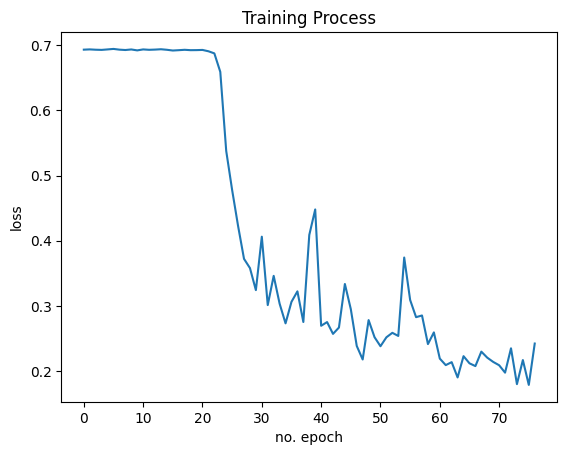

In [321]:
# plot loss against training (no. of epochs)
plt.plot(history.history['loss'])
plt.xlabel('no. epoch')
plt.ylabel('loss')
plt.title('Training Process')
plt.show()

## Predictive Accuracy

In [326]:
# Calculate model accuracy on the test dataset

model.evaluate(x=vectorize_layer(X_test), y=y_test.astype('int32'))

10/10 [==============================] - 0s 4ms/step - loss: 0.8617 - binary_accuracy: 0.7886


[0.86165452003479, 0.7885906100273132]

In [329]:
model.metrics_names

['loss', 'binary_accuracy']

Using the test dataset, the predictive accuracy of the model was calculated to be [XX].

# Summary

## Functionality
The RNN model can classify a Yelp review as either positive or negative (1 or 0, respectively). Recall in ‘Research Question’ that the goal of this analysis was to classify the following restaurant reviews:

1.	The pizza was disappointing. After a few bites, it left a weird taste in my mouth.

2.	The soup is spicy and super flavorful. This is my favorite place to eat!

Below is the classification of each review: 

In [323]:
# Predict the sentiment of both reviews
data = vectorize_layer(['The pizza was disappointing. After a few bites, it left a weird taste in my mouth.', 
                        'The soup is spicy and super flavorful. This is my favorite place to eat!'])
model.predict(data)

1/1 [==============================] - 0s 299ms/step


array([[1.7707044],
       [4.3911414]], dtype=float32)

## Recommendation

At [XX] accuracy, the model performs reasonably well and can be used for monitoring customer satisfaction and decision-making at restaurants. I recommend containerizing the model, deploying the model to an endpoint for real-time inference, and integrating the model endpoint into existing business intelligence applications and workflows.

# References